In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import urllib.request

In [5]:
# counrty data from johns hopkins
url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'
urllib.request.urlretrieve(url, '/Users/pauldesalvo/Documents/jupyter_notebooks/COVID-19/covid_datasets/time_series_covid19_confirmed_global.csv')

('/Users/pauldesalvo/Documents/jupyter_notebooks/COVID-19/covid_datasets/time_series_covid19_confirmed_global.csv',
 <http.client.HTTPMessage at 0x7fc817481610>)

In [6]:
#state data from new york times
url_states = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
urllib.request.urlretrieve(url_states, '/Users/pauldesalvo/Documents/jupyter_notebooks/COVID-19/covid_datasets/us-states.csv')

('/Users/pauldesalvo/Documents/jupyter_notebooks/COVID-19/covid_datasets/us-states.csv',
 <http.client.HTTPMessage at 0x7fc817481e90>)

In [60]:
countries_df = pd.read_csv('covid_datasets/time_series_covid19_confirmed_global.csv')

In [61]:
states_df = pd.read_csv('covid_datasets/us-states.csv')

In [62]:
pd.set_option('display.max_rows', 500)

In [63]:
countries_df.describe()

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean    21.076624   22.829441    2.086466    2.458647    3.537594    5.390977   
std     24.904600   70.191330   27.279200   27.377862   34.083035   47.434934   
min    -51.796300 -135.000000    0.000000    0.000000    0.000000    0.000000   
25%      6.677575  -15.277675    0.000000    0.000000    0.000000    0.000000   
50%     22.820850   20.921188    0.000000    0.000000    0.000000    0.000000   
75%     41.143200   77.913685    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000  444.000000  444.000000  549.000000  761.000000   

           1/26/20      1/27/20      1/28/20      1/29/20  ...       7/17/20  \
count   266.000000   266.000000   266.000000   266.000000  ...  2.660000e+02   
mean      7.962406    11.003759    20.969925    23.180451  ...  5.283950e+04   
std      66.289178    89.313757   219.187744   220.524977  ...  2.720146e+05   
min       0.000000     0.000000     0.000000     0.000000  ...  0.000000e+00   
25%       0.000000     0.000000     0.000000     0.000000  ...  2.495000e+02   
50%       0.000000     0.000000     0.000000     0.000000  ...  1.589000e+03   
75%       0.000000     0.000000     0.000000     0.000000  ...  1.370725e+04   
max    1058.000000  1423.000000  3554.000000  3554.000000  ...  3.647715e+06   

            7/18/20       7/19/20       7/20/20       7/21/20       7/22/20  \
count  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02   
mean   5.373286e+04  5.453981e+04  5.531717e+04  5.619482e+04  5.724988e+04   
std    2.767198e+05  2.812228e+05  2.855753e+05  2.906568e+05  2.969408e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.495000e+02  2.495000e+02  2.495000e+02  2.495000e+02  2.502500e+02   
50%    1.591500e+03  1.608500e+03  1.644000e+03  1.658000e+03  1.689500e+03   
75%    1.389775e+04  1.407550e+04  1.425850e+04  1.447925e+04  1.478700e+04   
max    3.711413e+06  3.773260e+06  3.834677e+06  3.899211e+06  3.970121e+06   

            7/23/20       7/24/20       7/25/20       7/26/20  
count  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02  
mean   5.831288e+04  5.936989e+04  6.033058e+04  6.109978e+04  
std    3.029832e+05  3.091674e+05  3.148280e+05  3.191812e+05  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    2.565000e+02  2.565000e+02  2.635000e+02  2.637500e+02  
50%    1.702000e+03  1.711500e+03  1.723000e+03  1.779000e+03  
75%    1.545100e+04  1.601425e+04  1.635575e+04  1.643000e+04  
max    4.038816e+06  4.112531e+06  4.178970e+06  4.233923e+06  

[8 rows x 189 columns]

In [64]:
countries_df['7 day change'] = countries_df.iloc[:,-1] / (countries_df.iloc[:,len(countries_df.columns) - 7]) -1

In [74]:
countries_df['Rank'] = countries_df['7 day change'].rank(ascending = False)

In [75]:
countries_df

Province/State                    Country/Region  \
0                                 NaN                       Afghanistan   
1                                 NaN                           Albania   
2                                 NaN                           Algeria   
3                                 NaN                           Andorra   
4                                 NaN                            Angola   
5                                 NaN               Antigua and Barbuda   
6                                 NaN                         Argentina   
7                                 NaN                           Armenia   
8        Australian Capital Territory                         Australia   
9                     New South Wales                         Australia   
10                 Northern Territory                         Australia   
11                         Queensland                         Australia   
12                    South Australia                         Australia   
13                           Tasmania                         Australia   
14                           Victoria                         Australia   
15                  Western Australia                         Australia   
16                                NaN                           Austria   
17                                NaN                        Azerbaijan   
18                                NaN                           Bahamas   
19                                NaN                           Bahrain   
20                                NaN                        Bangladesh   
21                                NaN                          Barbados   
22                                NaN                           Belarus   
23                                NaN                           Belgium   
24                                NaN                             Benin   
25                                NaN                            Bhutan   
26                                NaN                           Bolivia   
27                                NaN            Bosnia and Herzegovina   
28                                NaN                            Brazil   
29                                NaN                            Brunei   
30                                NaN                          Bulgaria   
31                                NaN                      Burkina Faso   
32                                NaN                        Cabo Verde   
33                                NaN                          Cambodia   
34                                NaN                          Cameroon   
35                            Alberta                            Canada   
36                   British Columbia                            Canada   
37                     Grand Princess                            Canada   
38                           Manitoba                            Canada   
39                      New Brunswick                            Canada   
40          Newfoundland and Labrador                            Canada   
41                        Nova Scotia                            Canada   
42                            Ontario                            Canada   
43               Prince Edward Island                            Canada   
44                             Quebec                            Canada   
45                       Saskatchewan                            Canada   
46                                NaN          Central African Republic   
47                                NaN                              Chad   
48                                NaN                             Chile   
49                              Anhui                             China   
50                            Beijing                             China   
51                          Chongqing                             China   
52                             Fujian           

In [76]:
date_column = list(countries_df.columns)[4:-2]

In [ ]:
#pd.set_option('display.max_rows', 500)

#countries_df.dtypes

In [77]:
#use the diff to turn the cumulative data into new daily cases
diff_df = countries_df.iloc[:,4:-2].diff(axis=1)

In [78]:
diff_df

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
6        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8        NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
9        NaN      0.0      0.0      0.0      3.0      1.0      0.0      0.0   
10       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
11       NaN      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
12       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
13       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
14       NaN      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
15       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
16       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
17       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
18       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
19       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
20       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
21       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
22       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
24       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
26       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
27       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
28       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
29       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
30       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
31       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
32       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
33       NaN      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
34       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
35       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
36       NaN      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
37       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
38       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
39       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
40       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
41       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
42       NaN      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
43       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
44       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
45       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
46       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
47       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
48       NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
49       NaN      8.0      6.0     24.0     21.0     10

In [79]:
#Select countries only and the 7 day change column
countries_only_df = countries_df.iloc[:, np.r_[:4,-2,-1]]

In [80]:
countries_only_df

Province/State                    Country/Region  \
0                                 NaN                       Afghanistan   
1                                 NaN                           Albania   
2                                 NaN                           Algeria   
3                                 NaN                           Andorra   
4                                 NaN                            Angola   
5                                 NaN               Antigua and Barbuda   
6                                 NaN                         Argentina   
7                                 NaN                           Armenia   
8        Australian Capital Territory                         Australia   
9                     New South Wales                         Australia   
10                 Northern Territory                         Australia   
11                         Queensland                         Australia   
12                    South Australia                         Australia   
13                           Tasmania                         Australia   
14                           Victoria                         Australia   
15                  Western Australia                         Australia   
16                                NaN                           Austria   
17                                NaN                        Azerbaijan   
18                                NaN                           Bahamas   
19                                NaN                           Bahrain   
20                                NaN                        Bangladesh   
21                                NaN                          Barbados   
22                                NaN                           Belarus   
23                                NaN                           Belgium   
24                                NaN                             Benin   
25                                NaN                            Bhutan   
26                                NaN                           Bolivia   
27                                NaN            Bosnia and Herzegovina   
28                                NaN                            Brazil   
29                                NaN                            Brunei   
30                                NaN                          Bulgaria   
31                                NaN                      Burkina Faso   
32                                NaN                        Cabo Verde   
33                                NaN                          Cambodia   
34                                NaN                          Cameroon   
35                            Alberta                            Canada   
36                   British Columbia                            Canada   
37                     Grand Princess                            Canada   
38                           Manitoba                            Canada   
39                      New Brunswick                            Canada   
40          Newfoundland and Labrador                            Canada   
41                        Nova Scotia                            Canada   
42                            Ontario                            Canada   
43               Prince Edward Island                            Canada   
44                             Quebec                            Canada   
45                       Saskatchewan                            Canada   
46                                NaN          Central African Republic   
47                                NaN                              Chad   
48                                NaN                             Chile   
49                              Anhui                             China   
50                            Beijing                             China   
51                          Chongqing                             China   
52                             Fujian           

In [81]:
#.sort_values(by=countries_df.columns[-1], ascending=False)

In [82]:
merge1 = pd.concat([countries_only_df,diff_df], axis = 1, join = 'inner')

In [83]:
country_new_daily_cases = merge1.sort_values(by=merge1.columns[-1], ascending = False)

In [84]:
top_20_countries = country_new_daily_cases[:20]

In [85]:
df_new = pd.melt(frame=top_20_countries, id_vars=['Country/Region','Lat','Long','7 day change','Rank'], value_vars=date_column,  value_name="Number of Cases", var_name="Date")

In [86]:
df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m/%d/%y') 

In [87]:

df_new['Country (7 day change)']= df_new["Rank"].map(str) + ' ' +df_new["Country/Region"] + ' (' + (round((df_new["7 day change"]*100),1)).map(str) + '%)'

In [88]:
df_new.head(5000)

Country/Region        Lat        Long  7 day change   Rank       Date  \
0                US  40.000000 -100.000000      0.104115   76.0 2020-01-22   
1             India  20.593684   78.962880      0.242594   26.0 2020-01-22   
2            Brazil -14.235000  -51.925300      0.141810   56.0 2020-01-22   
3      South Africa -30.559500   22.937500      0.192183   36.0 2020-01-22   
4            Russia  61.524010  105.318756      0.044912  122.0 2020-01-22   
...             ...        ...         ...           ...    ...        ...   
3735         Panama   8.538000  -80.782100      0.107853   73.0 2020-07-26   
3736     Kazakhstan  48.019600   66.923700      0.131404   59.0 2020-07-26   
3737         Israel  31.046051   34.851612      0.191393   37.0 2020-07-26   
3738        Bolivia -16.290200  -63.588700      0.138348   57.0 2020-07-26   
3739           Oman  21.512583   55.923255      0.111184   71.0 2020-07-26   

      Number of Cases     Country (7 day change)  
0                 NaN            76.0 US (10.4%)  
1                 NaN         26.0 India (24.3%)  
2                 NaN        56.0 Brazil (14.2%)  
3                 NaN  36.0 South Africa (19.2%)  
4                 NaN        122.0 Russia (4.5%)  
...               ...                        ...  
3735           1432.0        73.0 Panama (10.8%)  
3736           1402.0    59.0 Kazakhstan (13.1%)  
3737           1278.0        37.0 Israel (19.1%)  
3738           1148.0       57.0 Bolivia (13.8%)  
3739           1147.0          71.0 Oman (11.1%)  

[3740 rows x 8 columns]

In [89]:
#total_cases_by_country = (df_new[df_new.Date == df_new.Date.max()].sort_values('Number of Cases', ascending = False)) 

In [90]:
#total_cases_by_country.reset_index()

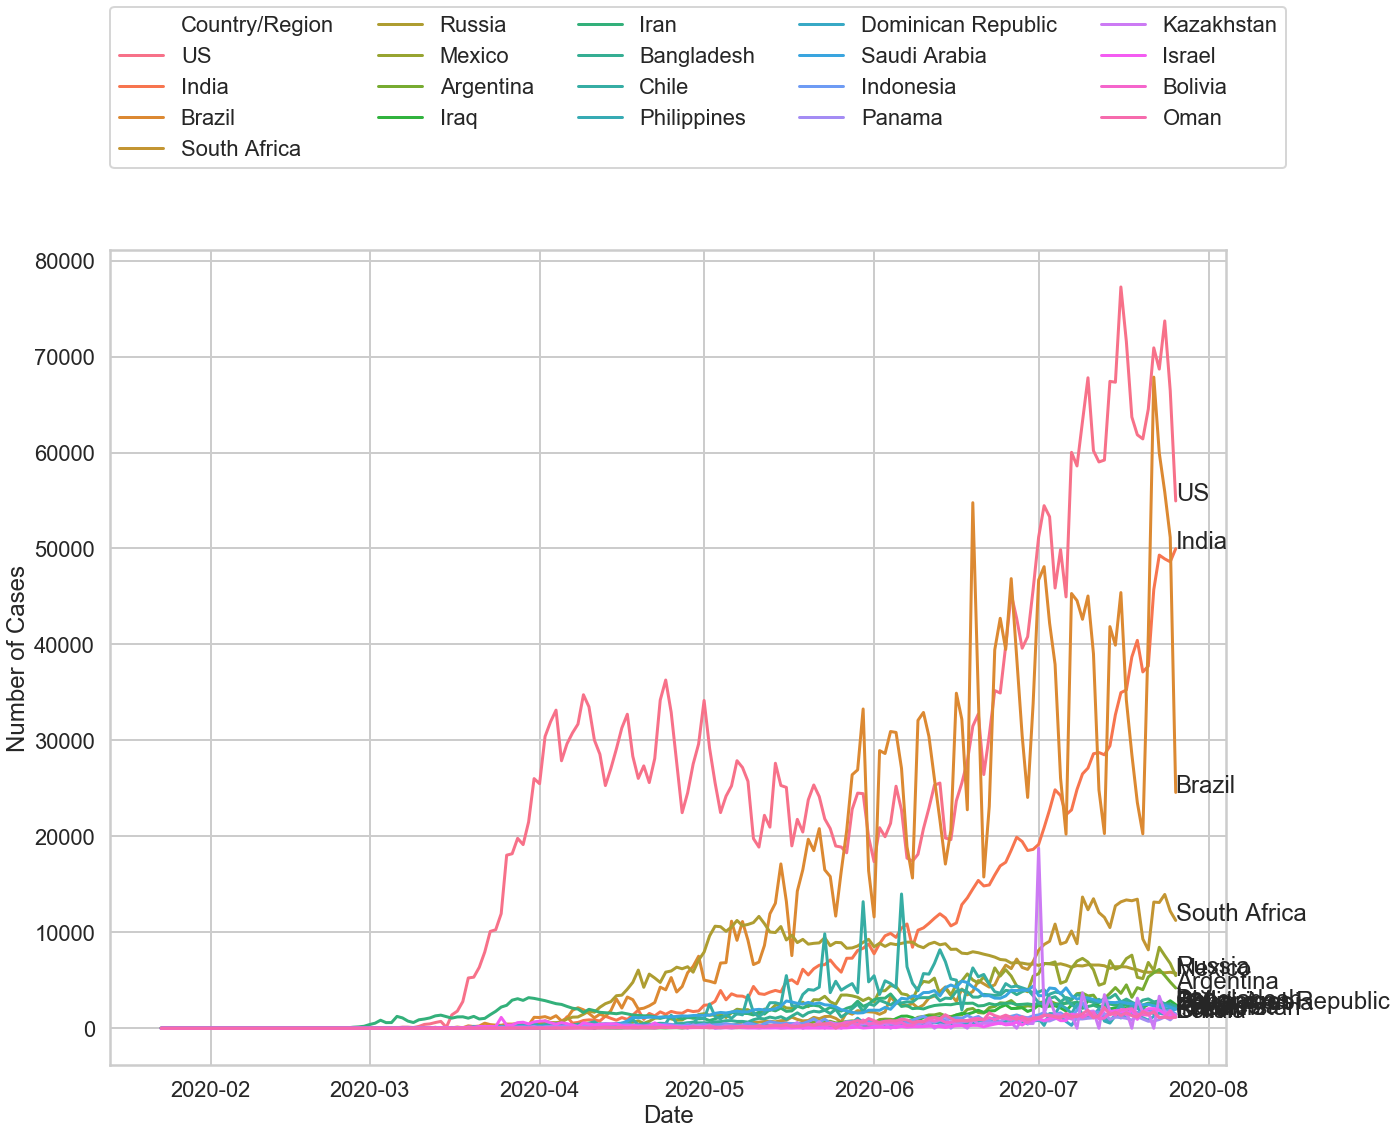

In [91]:
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,15))

sns.lineplot(data = df_new, x='Date', y='Number of Cases', hue = 'Country/Region')
plt.legend(ncol = 5,loc = (0,1.1))

xmax= df_new['Date'].max()

#ax.annotate('US', xy=(xmax, 70000),  
#            xycoords='data'
            #,xytext=(0.8, 0.95), 
            #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', 
            #shrink=0.05),
            #horizontalalignment='right', 
            #verticalalignment='top',
#            )

filt = df_new[df_new.Date == df_new.Date.max()]

for index, row in filt.iterrows():
    ax.annotate(row['Country/Region'], xy=(row['Date'], row['Number of Cases']),  
            xycoords='data')

plt.show()

In [ ]:
df

# Rolling Average

In [92]:
#now we can find the rolling average
rolling_avg_df = diff_df.rolling(window=7, axis = 1).mean()

In [93]:
merge2 = pd.concat([countries_only_df,rolling_avg_df], axis = 1, join = 'inner')

In [94]:
country_new_daily_cases_rolling_avg = merge2.sort_values(by=merge2.columns[-1], ascending = False)

In [95]:
top_20_countries_roll = country_new_daily_cases_rolling_avg[:20]

In [96]:
countries_rolling_average = pd.melt(frame=top_20_countries_roll, id_vars=['Country/Region','Lat','Long'], value_vars=date_column,  value_name="Number of Cases", var_name="Date")

In [97]:
countries_rolling_average['Date'] = pd.to_datetime(countries_rolling_average['Date'], format='%m/%d/%y') 

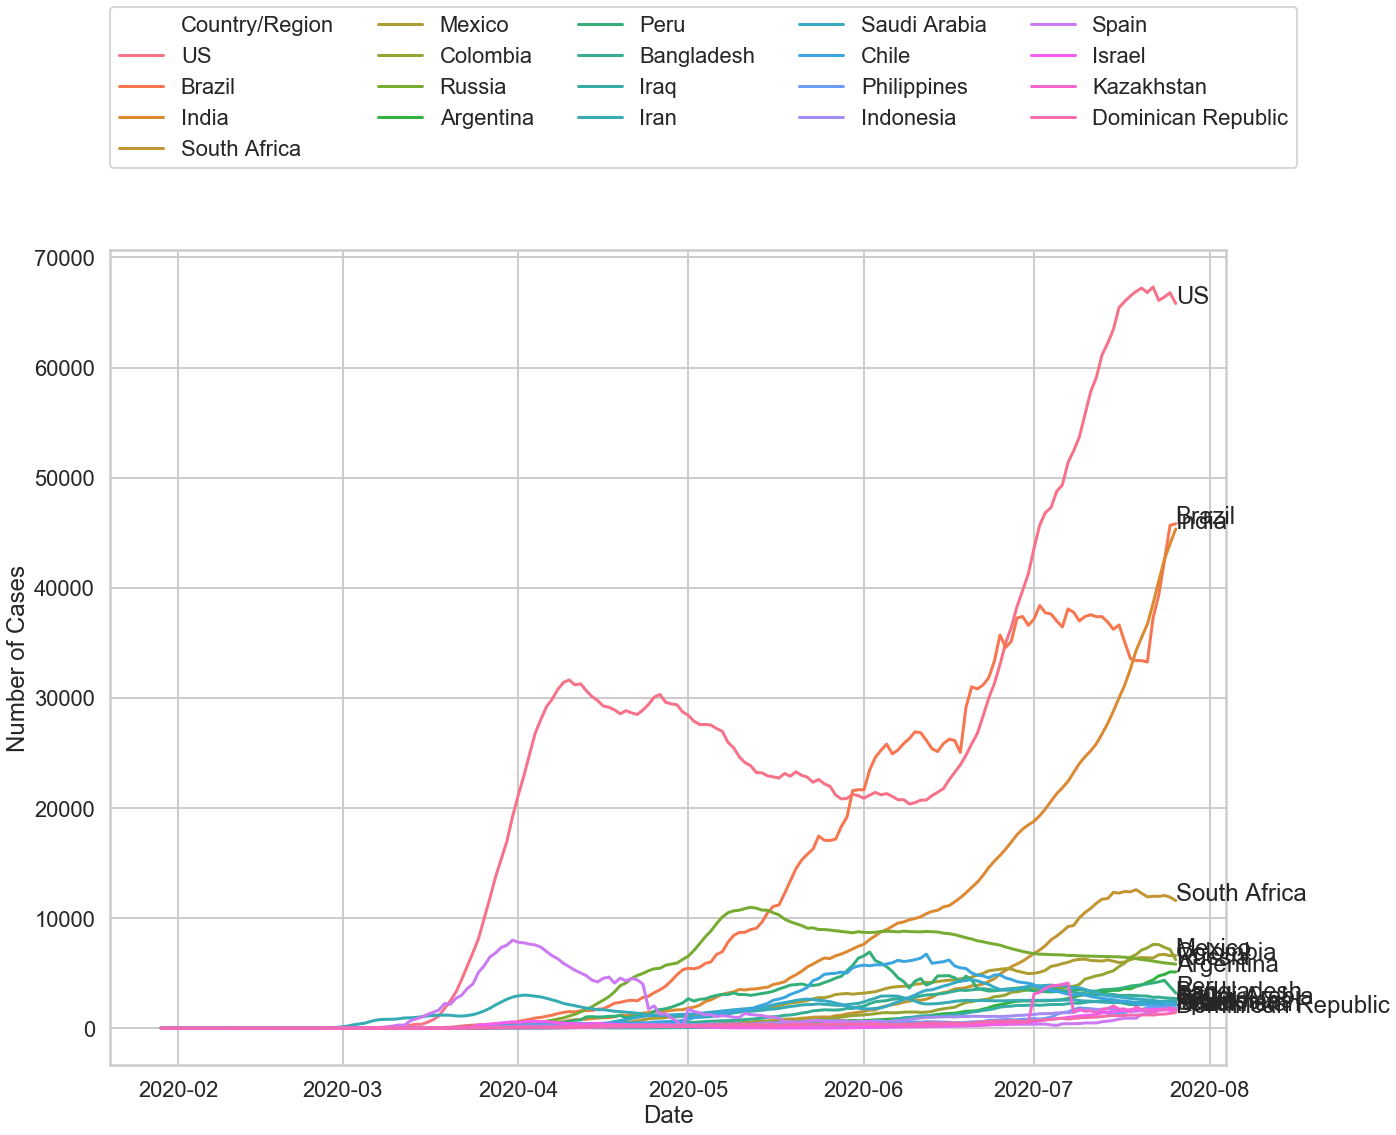

In [98]:
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,15))

sns.lineplot(data = countries_rolling_average, x='Date', y='Number of Cases', hue = 'Country/Region')
plt.legend(ncol = 5,loc = (0,1.1))

xmax= df_new['Date'].max()

#ax.annotate('US', xy=(xmax, 70000),  
#            xycoords='data'
            #,xytext=(0.8, 0.95), 
            #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', 
            #shrink=0.05),
            #horizontalalignment='right', 
            #verticalalignment='top',
#            )

filt = countries_rolling_average[df_new.Date == df_new.Date.max()]

for index, row in filt.iterrows():
    ax.annotate(row['Country/Region'], xy=(row['Date'], row['Number of Cases']),  
            xycoords='data')

plt.show()

In [99]:
filt[:3]

Country/Region        Lat       Long       Date  Number of Cases
3720             US  40.000000 -100.00000 2020-07-26     65809.000000
3721         Brazil -14.235000  -51.92530 2020-07-26     45814.571429
3722          India  20.593684   78.96288 2020-07-26     45344.285714

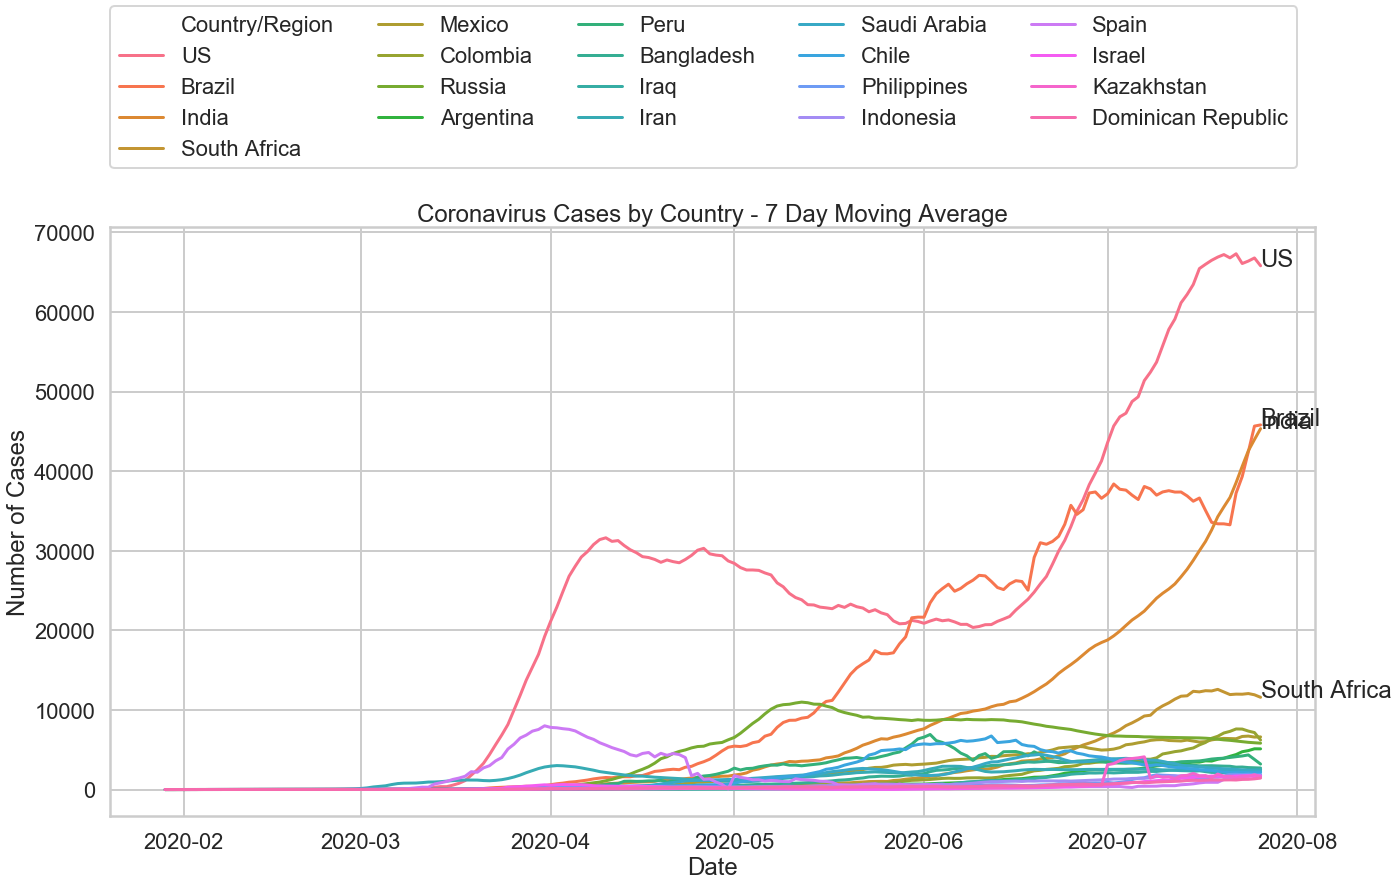

In [100]:
# get a closer look at the lower countries
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,13))

sns.lineplot(data = countries_rolling_average, x='Date', y='Number of Cases', hue = 'Country/Region')

#ax.set_yticks(range(0,8000,1000))
#plt.ylim(0,10000)
#plt.margins(y=12000)

plt.legend(ncol = 5,loc = (0,1.1))
plt.title('Coronavirus Cases by Country - 7 Day Moving Average')

xmax= df_new['Date'].max()

#ax.annotate('US', xy=(xmax, 70000),  
#            xycoords='data'
            #,xytext=(0.8, 0.95), 
            #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', 
            #shrink=0.05),
            #horizontalalignment='right', 
            #verticalalignment='top',
#            )

#return only the first 4 countries labels becasue the rest just overlap
filt = countries_rolling_average[df_new.Date == df_new.Date.max()][:4]

for index, row in filt.iterrows():
    ax.annotate(row['Country/Region'], xy=(row['Date'], row['Number of Cases']),  
            xycoords='data')

f.tight_layout()
plt.savefig('covid_cases_by_country.png')
plt.show()


# Country by Country Data

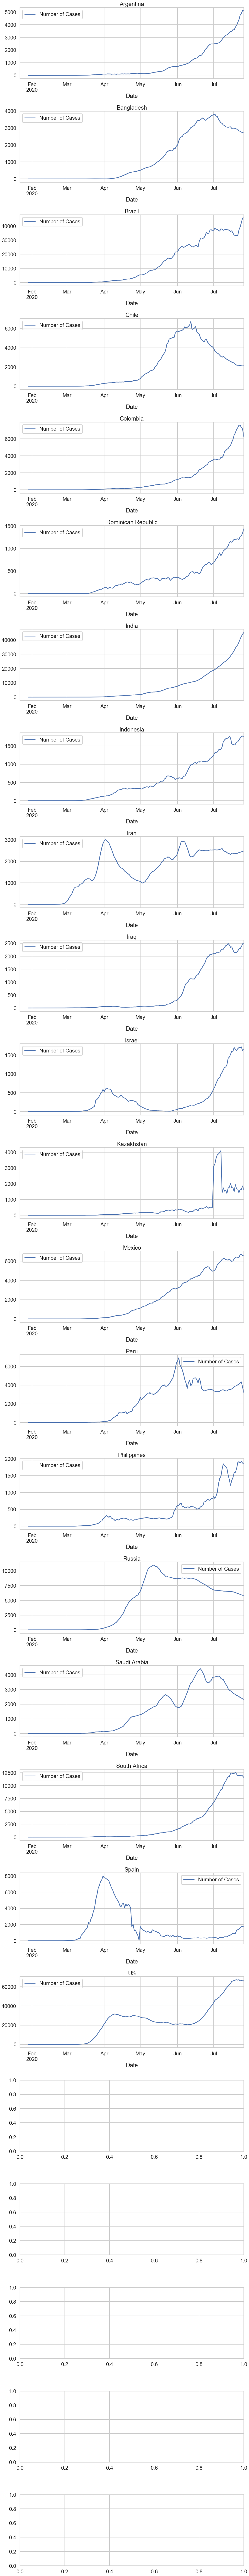

In [101]:
fig, axes = plt.subplots(25,1, figsize=(15,150))
for (year, group), ax in zip(countries_rolling_average.groupby('Country/Region'), axes.flatten()):
    group.plot(x='Date', y='Number of Cases', kind='line', ax=ax, title=year)
    
fig.tight_layout()

# Sorting by biggest Change

In [102]:
df_sorted = df_new.sort_values(by = '7 day change', ascending = False)

In [103]:
df_sorted.reset_index()

index Country/Region      Lat     Long  7 day change   Rank       Date  \
0      1326      Argentina -38.4161 -63.6167      0.242801   25.0 2020-03-28   
1      3286      Argentina -38.4161 -63.6167      0.242801   25.0 2020-07-04   
2      1266      Argentina -38.4161 -63.6167      0.242801   25.0 2020-03-25   
3       626      Argentina -38.4161 -63.6167      0.242801   25.0 2020-02-22   
4      1526      Argentina -38.4161 -63.6167      0.242801   25.0 2020-04-07   
...     ...            ...      ...      ...           ...    ...        ...   
3735   1170          Chile -35.6751 -71.5430      0.038318  134.0 2020-03-20   
3736   3270          Chile -35.6751 -71.5430      0.038318  134.0 2020-07-03   
3737   1190          Chile -35.6751 -71.5430      0.038318  134.0 2020-03-21   
3738   1210          Chile -35.6751 -71.5430      0.038318  134.0 2020-03-22   
3739   1870          Chile -35.6751 -71.5430      0.038318  134.0 2020-04-24   

      Number of Cases  Country (7 day change)  
0               101.0  25.0 Argentina (24.3%)  
1              2590.0  25.0 Argentina (24.3%)  
2                 0.0  25.0 Argentina (24.3%)  
3                 0.0  25.0 Argentina (24.3%)  
4                74.0  25.0 Argentina (24.3%)  
...               ...                     ...  
3735            196.0      134.0 Chile (3.8%)  
3736           3548.0      134.0 Chile (3.8%)  
3737            131.0      134.0 Chile (3.8%)  
3738             95.0      134.0 Chile (3.8%)  
3739            494.0      134.0 Chile (3.8%)  

[3740 rows x 9 columns]

In [104]:
fig, axes = plt.subplots(10,2, figsize=(100,100))
for (year, group), ax in zip(df_new.groupby('Country (7 day change)'), axes.flatten()):
    group.plot(x='Date', y='Number of Cases', kind='line', ax=ax, title=year)
    
fig.tight_layout()
plt.savefig('cases_by_country.png')

In [ ]:
test = df_new.groupby('Country (7 day change)')
print(test)

# Silly Video

In [ ]:
heatmap_df = countries_df[countries_df['Province/State'].isna()]

In [ ]:
heatmap_df

In [ ]:
heatmap_df = heatmap_df.iloc[:, np.r_[1,4:len(heatmap_df.columns)-1]]

In [ ]:
heatmap_df = heatmap_df.fillna(0)

In [ ]:
heatmap_df = heatmap_df.set_index('Country/Region')


In [ ]:
transposed_df = heatmap_df.transpose()

In [ ]:
import bar_chart_race as bcr
df = transposed_df
bcr.bar_chart_race(
    df=df,
    filename='covid19_horiz.mp4',
    orientation='h',
    sort='desc',
    n_bars=6,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%B %d, %Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='COVID-19 Deaths by Country',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)  

# Quick Testing

In [ ]:
test_df = countries_df[['7/17/20','7/18/20','7/19/20','7/20/20','7/21/20','7/22/20']]

In [ ]:
test_df.iloc[225].plot()